# 7) 소프트맥스 회귀(Softmax Regression) - 다중 클래스 분류

## 5. 소프트맥스 회귀(Softmax Regression)


### 1) 아이리스 품종 데이터에 대한 이해

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/딥러닝을 이용한 자연어처리 입문/07. 머신 러닝(Machine Learning) 개요/iris.csv',encoding='latin1')

In [10]:
print(len(data)) # 총 샘플의 개수 출력
print(data[:5]) # 샘플 중 5개 출력

150
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [11]:
print("품종 종류:", data["species"].unique(), sep="\n")
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력

품종 종류:
['setosa' 'versicolor' 'virginica']


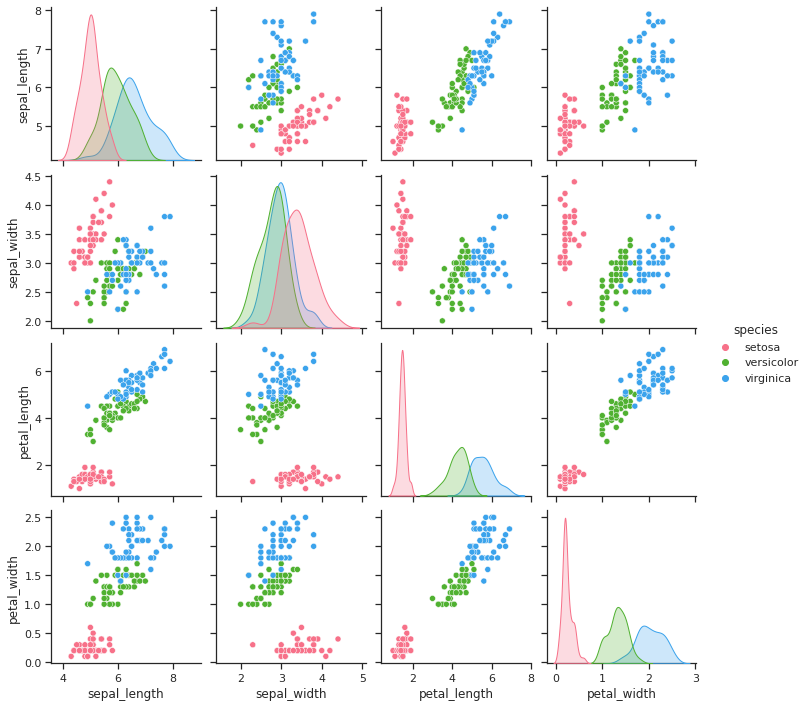

In [12]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="species", palette="husl")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


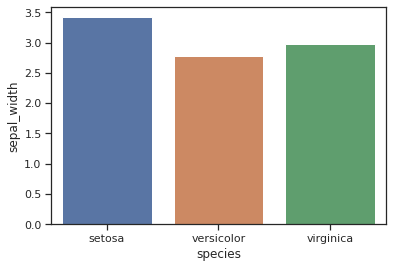

In [15]:
sns.barplot(data['species'], data['sepal_width'], ci=None)
# 각 종과 특성에 대한 연관 관계

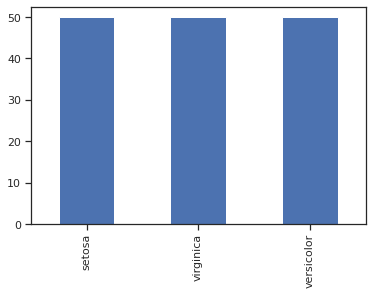

In [16]:
import matplotlib.pyplot as plt
data['species'].value_counts().plot(kind='bar')

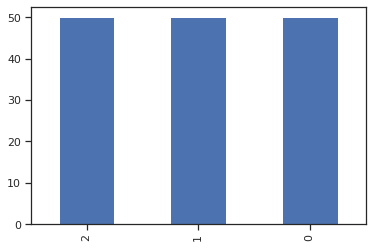

In [17]:
data['species'] = data['species'].replace(['virginica','setosa','versicolor'],[0,1,2])
# virginica는 0, setosa는 1, versicolor는 2가 됨.
data['species'].value_counts().plot(kind='bar')

In [19]:
from sklearn.model_selection import train_test_split
data_X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['species'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [21]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩

print(y_train[:5],'\n')
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]] 

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### 2) 소프트맥스 회귀

In [22]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.

history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 1.8563 - accuracy: 0.0000e+00 - val_loss: 1.8610 - val_accuracy: 0.0333
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 1.6861 - accuracy: 0.0500 - val_loss: 1.7190 - val_accuracy: 0.0333
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 1.5892 - accuracy: 0.0917 - val_loss: 1.6171 - val_accuracy: 0.1000
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.5051 - accuracy: 0.0500 - val_loss: 1.5229 - val_accuracy: 0.1333
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.4114 - accuracy: 0.0833 - val_loss: 1.4658 - val_accuracy: 0.0667
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 1.3340 - accuracy: 0.0917 - val_loss: 1.3762 - val_accuracy: 0.1000
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 1.2552 - accuracy: 0.1833 - val_loss: 1.2754 - val_accuracy: 0.

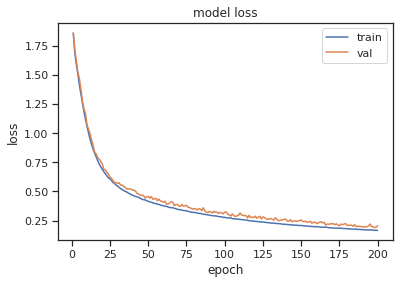

In [24]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [25]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.2056 - accuracy: 0.9667

 테스트 정확도: 0.9667
